In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')#ignore warnings

df =  pd.read_csv('processed.cleveland.csv')
df.loc[df.target == 2, 'target']=1
df.loc[df.target == 3, 'target']=1
df.loc[df.target == 4, 'target']=1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [55]:
corr = df.corr()
corr.sort_values(by="target",ascending=False)["target"][1:]

thal        0.526640
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='thalach'>

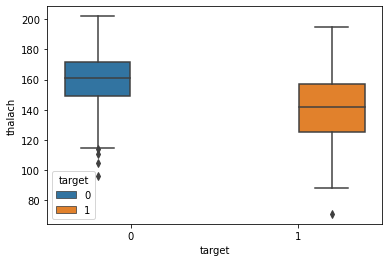

In [56]:
sns.boxplot(y='thalach',x='target',data=df,hue='target')

In [57]:
df_forest = df
qualFeature = ["sex","restecg","fbs","exang","slope","cp","thal"]
df_forest[qualFeature] = df_forest[qualFeature].astype('object')
df_forest = pd.get_dummies(df)

In [58]:
X_forest = df_forest.drop(columns='target')
y_forest = df_forest['target']

In [59]:
from sklearn.model_selection import train_test_split
X1, test_x, y1, test_y = train_test_split(X_forest, y_forest, test_size=0.2, random_state=0)
train_x, validation_x, train_y, validation_y = train_test_split(X1, y1, test_size=0.2, random_state=0)
print(train_x.shape)

(189, 25)


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=1)
param_grid = {
    'max_depth': [1,2,3,4,5],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [20,50,100]
}
forest_grid = GridSearchCV(estimator=forest,
                           cv=10,
                           param_grid=param_grid,
                          )
forest_grid.fit(train_x, train_y)
forest_grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [61]:
forest = RandomForestClassifier(max_depth=2,
                                criterion='gini',
                                n_estimators=20,
                                random_state=1
                                )

from sklearn.metrics import confusion_matrix, auc, roc_curve,accuracy_score, precision_score, recall_score

forest.fit(train_x, train_y)

print("for training set:")
recall = recall_score(train_y, forest.predict(train_x))
pre = precision_score(train_y, forest.predict(train_x))
F = 1/recall + 1/pre
score = forest.score(train_x,train_y)
print("precision is:",pre)
print("recall is:",recall)
print("F-measure:",F)
print("Accuracy is:",score)
    
print("for validation set:")
recall = recall_score(validation_y, forest.predict(validation_x))
pre = precision_score(validation_y, forest.predict(validation_x))
F = 1/recall + 1/pre
score = forest.score(validation_x,validation_y)
print("precision is:",pre)
print("recall is:",recall)
print("F-measure:",F)
print("Accuracy is:",score)

for training set:
precision is: 0.8902439024390244
recall is: 0.8111111111111111
F-measure: 2.356164383561644
Accuracy is: 0.8624338624338624
for validation set:
precision is: 0.8
recall is: 0.7058823529411765
F-measure: 2.6666666666666665
Accuracy is: 0.8333333333333334


In [62]:
X_kmeans = df.drop(columns='target')
y_kmeans = df['target']
X1_kmeans, test_x_kmeans, y1_kmeans, test_y_kmeans = train_test_split(X_kmeans, y_kmeans, test_size=0.2, random_state=0)
train_x_kmeans, validation_x_kmeans, train_y_kmeans, validation_y_kmeans = train_test_split(X1_kmeans, y1_kmeans, test_size=0.2, random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(train_x_kmeans)
X_validation_std = StandardScaler().fit_transform(validation_x_kmeans)

In [64]:
from sklearn.cluster import KMeans
result = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(X_std)
    result.append(kmeans.inertia_)

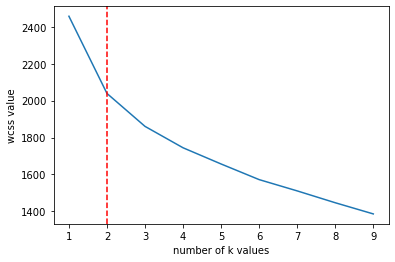

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(1,10), result)
plt.axvline(x=2,c='r', ls='--')
plt.xlabel("number of k values")
plt.ylabel("wcss value")
plt.show()

In [66]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_std)
pred = kmeans.predict(X_validation_std)
print("cluster accuracy of training data:" ,accuracy_score(train_y_kmeans,kmeans.labels_))
print("cluster accuracy of validation data:" ,accuracy_score(validation_y_kmeans,pred))

cluster accuracy of training data: 0.8253968253968254
cluster accuracy of validation data: 0.7916666666666666


In [67]:
print("Final chosen model for test set:")
recall = recall_score(test_y, forest.predict(test_x))
pre = precision_score(test_y, forest.predict(test_x))
score = forest.score(test_x,test_y)
print("precision is:",pre)
print("recall is:",recall)
print("Accuracy is:",score)

Final chosen model for test set:
precision is: 0.875
recall is: 0.7
Accuracy is: 0.8
